<a href="https://colab.research.google.com/github/AndryADSM/Asset-Analyzer/blob/main/asset_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 Asset Analyzer
## Project in progress!
My Website: https://aadsm2355.wixsite.com/andryadsm

# Set up

In [1]:
# !pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import yfinance as yf

```
(
    tickers:     Unknown,
    period:      str            = "max",
    interval:    str            = "1d",
    start:       Unknown | None = None,
    end:         Unknown | None = None,
    group_by:    str            = 'column',
    prepost:     bool           = False,
    auto_adjust: bool           = False,
    repair:      bool           = False,
    keepna:      bool           = False,
    actions:     bool           = False,
    threads:     bool           = True,
    ignore_tz:   Unknown | None = None,
    proxy:       Unknown | None = None,
    rounding:    bool           = False,
    show_errors: Unknown | None = None,
    timeout:     int            = 10,
    session:     Unknown | None = None
    back_adjust: bool           = False,
    progress:    bool           = True,
 ) -> Unknown

Download yahoo tickers
:Parameters:
    tickers:     str, list
        List of tickers to download
    period:      str
        Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        Either Use period parameter or use start and end
    interval:    str
        Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        Intraday data cannot extend last 60 days
    start:       str
        Download start date string (YYYY-MM-DD) or _datetime, inclusive.
        Default is 99 years ago
        E.g. for start="2020-01-01", the first data point will be on "2020-01-01"
    end:         str
        Download end date string (YYYY-MM-DD) or _datetime, exclusive.
        Default is now
        E.g. for end="2023-01-01", the last data point will be on "2022-12-31"
    group_by:    str
        Group by 'ticker' or 'column' (default)
    prepost:     bool
        Include Pre and Post market data in results?
        Default is False
    auto_adjust: bool
        Adjust all OHLC automatically? Default is False
    repair:      bool
        Detect currency unit 100x mixups and attempt repair
        Default is False
    keepna:      bool
        Keep NaN rows returned by Yahoo?
        Default is False
    actions:     bool
        Download dividend + stock splits data. Default is False
    threads:     bool / int
        How many threads to use for mass downloading. Default is True
    ignore_tz:   bool
        When combining from different timezones, ignore that part of datetime.
        Default depends on interval. Intraday = False. Day+ = True.
    proxy:       str
        Optional. Proxy server URL scheme. Default is None
    rounding:    bool
        Optional. Round values to 2 decimal places?
    show_errors: bool
        Optional. Doesn't print errors if False
        DEPRECATED, will be removed in future version
    timeout:     None or float
        If not None stops waiting for a response after given number of
        seconds. (Can also be a fraction of a second e.g. 0.01)
    session:     None or Session
        Optional. Pass your own session object to be used for all requests
```



In [2]:
def download_data(
    tickers:     list[str],
    start:       str  = '1900-01-01',
    end:         str  = '2100-01-01',
    interval:    str  = '1d',
    *,
    actions:     bool = False,
    auto_adjust: bool = False
) -> pd.DataFrame:

    """
    Downloads data from Yahoo Finance, gets the weekday number and name and creates columns of normalized prices
    ### Params
    tickers:     str, list
        List of tickers to download
    interval:    str
        Valid intervals: '1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo' or '3mo'
        intraday data cannot extend last 60 days
        except '60m' or '1h' which can be up to 730 days (1.5 years)
        and '1m' which only can be up to 7 days (1 week)

    #### Returns DataFrame
    """

    data = yf.download(tickers, start=start, end=end, group_by='ticker', interval=interval, actions=actions, auto_adjust=auto_adjust)

    if len(tickers) == 1:
        data.columns = pd.MultiIndex.from_product([tickers, data.columns], names=['Ticker', 'Price'])
    return data[tickers]

tickers = ['SPY', 'AAPL', 'TSLA', 'KO']#, 'DIS', 'BAC', 'XOM', 'GLD', 'CMG', 'USO', 'META']
# ['SPY', 'AAPL', 'META', 'GOOGL', 'MSFT', 'NFLX', 'DIS', 'AMZN', 'TSLA', 'MRNA', 'CMG', 'AMD', 'NVDA', 'BAC', 'XOM', 'CVX', 'USO', 'SLV', 'GLD']
data = download_data(tickers, '2023-01-01', '2024-01-01')
data

[*********************100%%**********************]  4 of 4 completed


Ticker             SPY                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2023-01-03  384.369995  386.429993  377.829987  380.820007  373.956818   
2023-01-04  383.179993  385.880005  380.000000  383.760010  376.843872   
2023-01-05  381.720001  381.839996  378.760010  379.380005  372.542755   
2023-01-06  382.609985  389.250000  379.410004  388.079987  381.085938   
2023-01-09  390.369995  393.700012  387.670013  387.859985  380.869934   
...                ...         ...         ...         ...         ...   
2023-12-22  473.859985  475.380005  471.700012  473.649994  472.182892   
2023-12-26  474.070007  476.579987  473.989990  475.649994  474.176697   
2023-12-27  475.440002  476.660004  474.890015  476.510010  475.034058   
2023-12-28  476.880005  477.549988  476.260010  476.690002  475.213501   
2023-12-29  476.489990  477.029999  473.299988  475.309998  473.837769   

Ticker                       AAPL                                      ...  \
Price          Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2023-01-03   74850700  130.279999  130.899994  124.169998  125.070000  ...   
2023-01-04   85934100  126.889999  128.660004  125.080002  126.360001  ...   
2023-01-05   76970500  127.129997  127.769997  124.760002  125.019997  ...   
2023-01-06  104189600  126.010002  130.289993  124.889999  129.619995  ...   
2023-01-09   73978100  130.470001  133.410004  129.889999  130.149994  ...   
...               ...         ...         ...         ...         ...  ...   
2023-12-22   67126600  195.179993  195.410004  192.970001  193.600006  ...   
2023-12-26   55387000  193.610001  193.889999  192.830002  193.050003  ...   
2023-12-27   68000300  192.490005  193.500000  191.089996  193.149994  ...   
2023-12-28   77158100  194.139999  194.660004  193.169998  193.580002  ...   
2023-12-29  122234100  193.899994  194.399994  191.729996  192.529999  ...   

Ticker            TSLA                                            KO  \
Price              Low       Close   Adj Close     Volume       Open   
Date                                                                   
2023-01-03  104.639999  108.099998  108.099998  231402800  63.560001   
2023-01-04  107.519997  113.639999  113.639999  180389000  63.150002   
2023-01-05  107.160004  110.339996  110.339996  157986300  62.599998   
2023-01-06  101.809998  113.059998  113.059998  220911100  62.910000   
2023-01-09  117.110001  119.769997  119.769997  190284000  63.299999   
...                ...         ...         ...        ...        ...   
2023-12-22  251.369995  252.539993  252.539993   93249800  58.119999   
2023-12-26  252.910004  256.609985  256.609985   86892400  58.060001   
2023-12-27  257.519989  261.440002  261.440002  106494400  58.639999   
2023-12-28  252.710007  253.179993  253.179993  113619900  58.650002   
2023-12-29  247.429993  248.479996  248.479996  100615300  58.740002   

Ticker                                                            
Price            High        Low      Close  Adj Close    Volume  
Date                                                              
2023-01-03  63.560001  62.180000  62.950001  60.540466  12180500  
2023-01-04  63.330002  62.509998  62.919998  60.511616  13387900  
2023-01-05  62.799999  62.080002  62.200001  59.819176   9814700  
2023-01-06  63.669998  62.580002  63.400002  60.973248   9990000  
2023-01-09  63.720001  62.580002  62.610001  60.213482   9442600  
...               ...        ...        ...        ...       ...  
2023-12-22  58.459999  58.020000  58.320000  57.857216   9028500  
2023-12-26  58.709999  58.060001  58.560001  58.095314   6422500  
2023-12-27  58.770000  58.400002  58.709999  58.244122   8560100  
2023-12-28  58.869999  58.529999  58.750000  58.283806   

# Get dataframes - needs mod for diff intervals

In [3]:
def get_pct_returns(
    data:      pd.DataFrame,
    *,
    round_val: int  = 6,
    as_pct:    bool = True
) -> pd.DataFrame:

    """
    Percentage return in different time frames

    ### Params
    data: pd.DataFrame
        takes unmodified data
    as_pct: bool=True
        if True values are expressed as percentages (e.g. 1.23 (%)), if False as decimals (e.g. 0.0123)
    """

    returns = pd.DataFrame(index=data.index, columns=pd.MultiIndex.from_product([[], []], names=['Ticker', 'TimeFrame']))

    for tk in data.columns.get_level_values(0).unique():
        # Intraday, open to close
        returns[tk, 'Intraday_ret'] = (data[tk, 'Close'] - data[tk, 'Open']) / data[tk, 'Open'] * 100
        # Overnight, close of previous day and todays open
        returns[tk, 'Overnight_ret'] = (data[tk, 'Open'] - data[tk, 'Close'].shift(1)) / data[tk, 'Close'].shift(1) * 100
        # Daily, close to close
        returns[tk, 'Daily_ret'] = data[tk, 'Close'].pct_change() * 100
        # Weekly and 2-3-4-week, 5 days apart per week close to close
        for week, shift in [(i, i * 5) for i in range(1, 5)]:
            returns[tk, f'{week}week_ret'] = (data[tk, 'Close'] - data[tk, 'Close'].shift(shift)) / data[tk, 'Close'].shift(shift) * 100

    returns = returns.round(round_val)

    # Turn percentage into decimal
    if as_pct == False:
        returns /= 100

    return returns

returns = get_pct_returns(data)
returns.head(10)

Ticker              SPY                                                        \
TimeFrame  Intraday_ret Overnight_ret Daily_ret 1week_ret 2week_ret 3week_ret   
Date                                                                            
2023-01-03    -0.923586           NaN       NaN       NaN       NaN       NaN   
2023-01-04     0.151369      0.619711  0.772019       NaN       NaN       NaN   
2023-01-05    -0.613014     -0.531584 -1.141340       NaN       NaN       NaN   
2023-01-06     1.429655      0.851384  2.293210       NaN       NaN       NaN   
2023-01-09    -0.642982      0.590087 -0.056690       NaN       NaN       NaN   
2023-01-10     0.859906     -0.157269  0.701284  2.562885       NaN       NaN   
2023-01-11     0.838788      0.422455  1.264786  3.064410       NaN       NaN   
2023-01-12     0.073103      0.290763  0.364078  4.633873       NaN       NaN   
2023-01-13     1.239776     -0.841394  0.387951  2.685017       NaN       NaN   
2023-01-17    -0.178183     -0.005016 -0.183190  2.555047       NaN       NaN   

Ticker                       AAPL                          ...      TSLA  \
TimeFrame  4week_ret Intraday_ret Overnight_ret Daily_ret  ... 2week_ret   
Date                                                       ...             
2023-01-03       NaN    -3.999078           NaN       NaN  ...       NaN   
2023-01-04       NaN    -0.417684      1.455185  1.031423  ...       NaN   
2023-01-05       NaN    -1.659719      0.609367 -1.060465  ...       NaN   
2023-01-06       NaN     2.864846      0.791878  3.679410  ...       NaN   
2023-01-09       NaN    -0.245273      0.655768  0.408887  ...       NaN   
2023-01-10       NaN     0.360818      0.084518  0.445641  ...       NaN   
2023-01-11       NaN     1.706671      0.397770  2.111229  ...       NaN   
2023-01-12       NaN    -0.351062      0.292156 -0.059931  ...       NaN   
2023-01-13       NaN     2.067709     -1.034409  1.011911  ...       NaN   
2023-01-17       NaN     0.823259      0.051950  0.875637  ...       NaN   

Ticker                                   KO                                    \
TimeFrame  3week_ret 4week_ret Intraday_ret Overnight_ret Daily_ret 1week_ret   
Date                                                                            
2023-01-03       NaN       NaN    -0.959724           NaN       NaN       NaN   
2023-01-04       NaN       NaN    -0.364218      0.317714 -0.047661       NaN   
2023-01-05       NaN       NaN    -0.638974     -0.508582 -1.144306       NaN   
2023-01-06       NaN       NaN     0.778893      1.141478  1.929262       NaN   
2023-01-09       NaN       NaN    -1.090045     -0.157732 -1.246058       NaN   
2023-01-10       NaN       NaN    -0.750795     -0.015975 -0.766650 -1.302621   
2023-01-11       NaN       NaN    -0.593143      0.402382 -0.193148 -1.446281   
2023-01-12       NaN       NaN    -1.449044      0.161268 -1.290113 -1.591643   
2023-01-13       NaN       NaN     1.202635     -0.833194  0.359420 -3.107257   
2023-01-17       NaN       NaN    -0.080997      0.488359  0.406967 -1.485386   

Ticker                                    
TimeFrame  2week_ret 3week_ret 4week_ret  
Date                                      
2023-01-03       NaN       NaN       NaN  
2023-01-04       NaN       NaN       NaN  
2023-01-05       NaN       NaN       NaN  
2023-01-06       NaN       NaN       NaN  
2023-01-09       NaN       NaN       NaN  
2023-01-10       NaN       NaN       NaN  
2023-01-11       NaN       NaN       NaN  
2023-01-12       NaN       NaN       NaN  
2023-01-13       NaN       NaN       NaN  
2023-01-17       NaN       NaN       NaN  

[10 rows x 28 columns]

In [4]:
def get_insights(
    returns:    pd.DataFrame,
    *,
    volatility: bool = True,
    mean:       bool = True,
    mean_abs:   bool = True,
    order_by:   str  = 'ins'
) -> pd.DataFrame:

    """
    Getting useful insights
    ### Params
    order_by: str='ins'
        If 'ins' it will order by insights, if 'ret' by return.
    """

    insights = pd.DataFrame(columns=pd.MultiIndex.from_product([[], []], names=['Insight', 'Return']))
    tks = returns.columns.get_level_values(0).unique()
    ret = returns.columns.get_level_values(1).unique()

    if order_by == 'ins':
        # Volatility
        if volatility:
            for col in ret:
                insights['Volatility', f'{col.split("_")[0]}'] = {tk: (returns[tk, col].std()) for tk in tks}
        # Include mean of values
        if mean:
            for col in ret:
                insights['Mean', f'{col.split("_")[0]}'] = {tk: returns[tk, col].mean() for tk in tks}
        # Include mean of absolute values
        if mean_abs:
            for col in ret:
                insights['Mean_abs', f'{col.split("_")[0]}'] = {tk: returns[tk, col].abs().mean() for tk in tks}

    if order_by == 'ret':
        for col in ret:
            # Volatility
            if volatility:
                insights['Volatility', f'{col.split("_")[0]}'] = {tk: (returns[tk, col].std()) for tk in tks}
            # Include mean of values
            if mean:
                insights['Mean', f'{col.split("_")[0]}'] = {tk: returns[tk, col].mean() for tk in tks}
            # Include mean of absolute values
            if mean_abs:
                insights['Mean_abs', f'{col.split("_")[0]}'] = {tk: returns[tk, col].abs().mean() for tk in tks}
        insights = insights.reorder_levels(['Return', 'Insight'], axis=1)

    insights = insights.T

    return insights

insights = get_insights(returns)
insights

SPY      AAPL       TSLA        KO
Insight    Return                                            
Volatility Intraday   0.710795  1.097405   2.822076  0.760887
           Overnight  0.479486  0.747747   2.067509  0.416771
           Daily      0.831854  1.256559   3.316561  0.838404
           1week      1.849446  2.962695   7.903388  1.737566
           2week      2.583894  4.180236  13.080842  2.711023
           3week      3.252005  5.184377  17.955956  3.415278
           4week      3.607978  5.730830  21.644233  4.033029
Mean       Intraday   0.072728  0.189365   0.274616 -0.066516
           Overnight  0.015963 -0.024290   0.082937  0.040208
           Daily      0.092496  0.181245   0.389272 -0.022983
           1week      0.454578  0.899815   1.974304 -0.124647
           2week      0.846060  1.768058   4.019707 -0.219497
           3week      1.234678  2.605001   5.987753 -0.234252
           4week      1.546635  3.334094   7.493537 -0.297083
Mean_abs   Intraday   0.553649  0.861888   2.191155  0.557293
           Overnight  0.375655  0.525222   1.435461  0.286907
           Daily      0.655174  0.973397   2.526449  0.612933
           1week      1.518222  2.488298   6.348248  1.352533
           2week      2.283524  3.670040  10.324967  2.155267
           3week      2.884924  4.713153  13.619457  2.786871
           4week      3.257992  5.258038  16.227209  3.315021

In [5]:
def top_results(
    insights:  pd.DataFrame,
    *,
    top:       int = 3,
    bot:       int = 3,
    round_val: int = 6
) -> None:

    """
    Display the top and bottom n results
    """

    for i in insights.index:
        display(pd.DataFrame([insights.loc[i].nlargest(top).round(round_val),
                              insights.loc[i].nsmallest(bot).round(round_val).sort_values(ascending=False)
                             ], index=[f'Top {i[0]}, {i[1]}', f'Bottom {i[0]}, {i[1]}']))

top_results(insights, top=4, bot=2, round_val=2)

,TSLA,AAPL,KO,SPY
"Top Volatility, Intraday",2.82,1.1,0.76,0.71
"Bottom Volatility, Intraday",NaN,NaN,0.76,0.71


,TSLA,AAPL,SPY,KO
"Top Volatility, Overnight",2.07,0.75,0.48,0.42
"Bottom Volatility, Overnight",NaN,NaN,0.48,0.42


,TSLA,AAPL,KO,SPY
"Top Volatility, Daily",3.32,1.26,0.84,0.83
"Bottom Volatility, Daily",NaN,NaN,0.84,0.83


,TSLA,AAPL,SPY,KO
"Top Volatility, 1week",7.9,2.96,1.85,1.74
"Bottom Volatility, 1week",NaN,NaN,1.85,1.74


,TSLA,AAPL,KO,SPY
"Top Volatility, 2week",13.08,4.18,2.71,2.58
"Bottom Volatility, 2week",NaN,NaN,2.71,2.58


,TSLA,AAPL,KO,SPY
"Top Volatility, 3week",17.96,5.18,3.42,3.25
"Bottom Volatility, 3week",NaN,NaN,3.42,3.25


,TSLA,AAPL,KO,SPY
"Top Volatility, 4week",21.64,5.73,4.03,3.61
"Bottom Volatility, 4week",NaN,NaN,4.03,3.61


,TSLA,AAPL,SPY,KO
"Top Mean, Intraday",0.27,0.19,0.07,-0.07
"Bottom Mean, Intraday",NaN,NaN,0.07,-0.07


,TSLA,KO,SPY,AAPL
"Top Mean, Overnight",0.08,0.04,0.02,-0.02
"Bottom Mean, Overnight",NaN,NaN,0.02,-0.02


,TSLA,AAPL,SPY,KO
"Top Mean, Daily",0.39,0.18,0.09,-0.02
"Bottom Mean, Daily",NaN,NaN,0.09,-0.02


,TSLA,AAPL,SPY,KO
"Top Mean, 1week",1.97,0.9,0.45,-0.12
"Bottom Mean, 1week",NaN,NaN,0.45,-0.12


,TSLA,AAPL,SPY,KO
"Top Mean, 2week",4.02,1.77,0.85,-0.22
"Bottom Mean, 2week",NaN,NaN,0.85,-0.22


,TSLA,AAPL,SPY,KO
"Top Mean, 3week",5.99,2.61,1.23,-0.23
"Bottom Mean, 3week",NaN,NaN,1.23,-0.23


,TSLA,AAPL,SPY,KO
"Top Mean, 4week",7.49,3.33,1.55,-0.3
"Bottom Mean, 4week",NaN,NaN,1.55,-0.3


,TSLA,AAPL,KO,SPY
"Top Mean_abs, Intraday",2.19,0.86,0.56,0.55
"Bottom Mean_abs, Intraday",NaN,NaN,0.56,0.55


,TSLA,AAPL,SPY,KO
"Top Mean_abs, Overnight",1.44,0.53,0.38,0.29
"Bottom Mean_abs, Overnight",NaN,NaN,0.38,0.29


,TSLA,AAPL,SPY,KO
"Top Mean_abs, Daily",2.53,0.97,0.66,0.61
"Bottom Mean_abs, Daily",NaN,NaN,0.66,0.61


,TSLA,AAPL,SPY,KO
"Top Mean_abs, 1week",6.35,2.49,1.52,1.35
"Bottom Mean_abs, 1week",NaN,NaN,1.52,1.35


,TSLA,AAPL,SPY,KO
"Top Mean_abs, 2week",10.32,3.67,2.28,2.16
"Bottom Mean_abs, 2week",NaN,NaN,2.28,2.16


,TSLA,AAPL,SPY,KO
"Top Mean_abs, 3week",13.62,4.71,2.88,2.79
"Bottom Mean_abs, 3week",NaN,NaN,2.88,2.79


,TSLA,AAPL,KO,SPY
"Top Mean_abs, 4week",16.23,5.26,3.32,3.26
"Bottom Mean_abs, 4week",NaN,NaN,3.32,3.26


In [6]:
def get_normalized_values(
    data:   pd.DataFrame,
    *,
    volume: bool = True
) -> pd.DataFrame:

    """
    Docs
    data: takes data with no added columns
    """

    norm_prices = pd.DataFrame(columns=pd.MultiIndex.from_product([[], []], names=['Ticker', 'Price']))
    tks = [tk for tk in data.columns.get_level_values(0).unique()]
    prices = [price for price in data.columns.get_level_values(1).unique() if price in ['Open', 'High', 'Low', 'Close', 'Adj Close']]

    # Calculate min and max price across all prices for each ticker
    min_price = {tk: data[tk][prices].min().min() for tk in tks}
    max_price = {tk: data[tk][prices].max().max() for tk in tks}

    # Normalize between 0 and 1
    for tk in tks:
        for price in prices:
            norm_prices[tk, f'{price}_norm']  = (data[tk, price]  - min_price[tk]) / (max_price[tk] - min_price[tk])
        if volume and 'Volume' in data.columns.get_level_values(1).unique():
            norm_prices[tk, 'Volume_norm'] = (data[tk, 'Volume'] - data[tk, 'Volume'].min()) / (data[tk, 'Volume'].max() - data[tk, 'Volume'].min())

    return norm_prices

data_norm = get_normalized_values(data)
data_norm

Ticker           SPY                                                \
Price      Open_norm High_norm  Low_norm Close_norm Adj Close_norm   
Date                                                                 
2023-01-03  0.112633  0.132250  0.050351   0.078826       0.013466   
2023-01-04  0.101300  0.127013  0.071016   0.106824       0.040960   
2023-01-05  0.087396  0.088539  0.059208   0.065112       0.000000   
2023-01-06  0.095872  0.159106  0.065398   0.147963       0.081358   
2023-01-09  0.169772  0.201484  0.144059   0.145868       0.079301   
...              ...       ...       ...        ...            ...   
2023-12-22  0.964860  0.979335  0.944290   0.962860       0.948888   
2023-12-26  0.966860  0.990763  0.966098   0.981906       0.967876   
2023-12-27  0.979906  0.991525  0.974669   0.990096       0.976040   
2023-12-28  0.993620  1.000000  0.987715   0.991810       0.977749   
2023-12-29  0.989905  0.995048  0.959527   0.978668       0.964648   

Ticker                      AAPL                                 ...  \
Price      Volume_norm Open_norm High_norm  Low_norm Close_norm  ...   
Date                                                             ...   
2023-01-03    0.282814  0.081022  0.089239  0.000044   0.011972  ...   
2023-01-04    0.352296  0.036093  0.059552  0.012105   0.029069  ...   
2023-01-05    0.296103  0.039274  0.047756  0.007864   0.011310  ...   
2023-01-06    0.466739  0.024430  0.081154  0.009587   0.072275  ...   
2023-01-09    0.277344  0.083540  0.122504  0.075853   0.079299  ...   
...                ...       ...       ...       ...        ...  ...   
2023-12-22    0.234392  0.941156  0.944204  0.911866   0.920216  ...   
2023-12-26    0.160797  0.920348  0.924059  0.910011   0.912926  ...   
2023-12-27    0.239869  0.905505  0.918890  0.886950   0.914252  ...   
2023-12-28    0.297279  0.927372  0.934264  0.914517   0.919951  ...   
2023-12-29    0.579860  0.924192  0.930818  0.895432   0.906035  ...   

Ticker          TSLA                                              KO  \
Price       Low_norm Close_norm Adj Close_norm Volume_norm Open_norm   
Date                                                                   
2023-01-03  0.014331   0.031851       0.031851    0.688619  0.893601   
2023-01-04  0.028914   0.059905       0.059905    0.477351  0.863095   
2023-01-05  0.027091   0.043194       0.043194    0.384573  0.822173   
2023-01-06  0.000000   0.056968       0.056968    0.645169  0.845238   
2023-01-09  0.077476   0.090946       0.090946    0.518330  0.874256   
...              ...        ...            ...         ...       ...   
2023-12-22  0.757342   0.763267       0.763267    0.116475  0.488839   
2023-12-26  0.765141   0.783877       0.783877    0.090146  0.484375   
2023-12-27  0.788485   0.808335       0.808335    0.171326  0.527530   
2023-12-28  0.764128   0.766508       0.766508    0.200835  0.528274   
2023-12-29  0.737391   0.742708       0.742708    0.146978  0.534970   

Ticker                                                                
Price      High_norm  Low_norm Close_norm Adj Close_norm Volume_norm  
Date                                                                  
2023-01-03  0.893601  0.790923   0.848214       0.668934    0.122017  
2023-01-04  0.876488  0.815476   0.845982       0.666787    0.142022  
2023-01-05  0.837054  0.783482   0.792411       0.615266    0.082820  
2023-01-06  0.901786  0.820685   0.881697       0.701135    0.085724  
2023-01-09  0.905506  0.820685   0.822917       0.644604    0.076655  
...              ...       ...        ...            ...         ...  
2023-12-22  0.514137  0.481399   0.503720       0.469287    0.069794  
2023-12-26  0.532738  0.484375   0.521578       0.487003    0.026617  
2023-12-27  0.537203  0.509673   0.532738       0.498075    0.062033  
2023-12-28  0.544643  0.519345   0.535714       0.501027    0.059382  
2023-12-29  0.552827  0.526786   0.549107       0.514314    0.073325  

[250 r

# Modifiers

In [7]:
data_mod = data.copy()

In [8]:
def drop_columns(
    data: pd.DataFrame,
    drop_cols: str | list[str],
    *,
    inplace: bool = False
) -> pd.DataFrame:

    """
    Drops all the columns specified out of the second level
    """

    # To be able to input a string
    if type(drop_cols) == str:
        drop_cols =[drop_cols]

    for tk in data.columns.get_level_values(0).unique():
        for col in drop_cols:
            # To overwrite
            if inplace:
                data.drop(columns=[(tk, col)], inplace=True, errors='ignore')
            # Not to overwrite
            else:
                data = data.drop(columns=[(tk, col)], errors='ignore')

    return data

drop_columns(data_mod, 'Adj Close', inplace=True).head(3)

Ticker             SPY                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2023-01-03  384.369995  386.429993  377.829987  380.820007  74850700   
2023-01-04  383.179993  385.880005  380.000000  383.760010  85934100   
2023-01-05  381.720001  381.839996  378.760010  379.380005  76970500   

Ticker            AAPL                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2023-01-03  130.279999  130.899994  124.169998  125.070000  112117500   
2023-01-04  126.889999  128.660004  125.080002  126.360001   89113600   
2023-01-05  127.129997  127.769997  124.760002  125.019997   80962700   

Ticker            TSLA                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2023-01-03  118.470001  118.800003  104.639999  108.099998  231402800   
2023-01-04  109.110001  114.589996  107.519997  113.639999  180389000   
2023-01-05  110.510002  111.750000  107.160004  110.339996  157986300   

Ticker             KO                                             
Price            Open       High        Low      Close    Volume  
Date                                                              
2023-01-03  63.560001  63.560001  62.180000  62.950001  12180500  
2023-01-04  63.150002  63.330002  62.509998  62.919998  13387900  
2023-01-05  62.599998  62.799999  62.080002  62.200001   9814700

# Get date values

In [9]:
def get_datetime(
    data:   pd.DataFrame,
    get:    str,
    *,
    concat: bool = False,
    place:  str  = 'beg',
    name:   bool = False,
    num:    bool = True
) -> pd.DataFrame:

    """
    Creates a DataFrame with the number and name of the day of the week and you can concatenate it with the source DataFrame

    ### Params
    get: str
        Valid inputs are: 'minute', 'hour', 'weekday', 'day_name', 'day', 'month', 'month_name', 'quarter' or 'year'
    place: str='beg'
        'beg' or 'end'

    #### Returns DataFrame
    """

    inputs = ['minute', 'hour', 'weekday', 'day_name', 'day', 'month', 'month_name', 'quarter', 'year']
    if get not in inputs:
        raise ValueError(f'Invalid input, get=\'{get}\', valid inputs are: {inputs}')

    if concat and f'{get.capitalize()}' in data.columns.get_level_values(1).unique():
        raise Exception(f'Already a column named \'{get}\'.')

    df = pd.DataFrame(index=data.index)
    dt = data.index.to_frame().iloc[:,0].dt

    if 'name' in get:
        dt = eval(f'dt.{get}()')
    elif get == 'weekday':
        dt = dt.weekday + 1
    else:
        dt = eval(f'dt.{get}')
    df[f'{get.capitalize()}'] = dt

    if concat:
        df.columns = pd.MultiIndex.from_arrays([['Datetime'], [f'{get.capitalize()}']])
        if place == 'end':
            return pd.concat([data, df], axis=1)
        return pd.concat([df, data], axis=1)
    return df

data_mod = get_datetime(data_mod, 'month', concat=True)
data_mod

Datetime         SPY                                      \
              Month        Open        High         Low       Close   
Date                                                                  
2023-01-03        1  384.369995  386.429993  377.829987  380.820007   
2023-01-04        1  383.179993  385.880005  380.000000  383.760010   
2023-01-05        1  381.720001  381.839996  378.760010  379.380005   
2023-01-06        1  382.609985  389.250000  379.410004  388.079987   
2023-01-09        1  390.369995  393.700012  387.670013  387.859985   
...             ...         ...         ...         ...         ...   
2023-12-22       12  473.859985  475.380005  471.700012  473.649994   
2023-12-26       12  474.070007  476.579987  473.989990  475.649994   
2023-12-27       12  475.440002  476.660004  474.890015  476.510010   
2023-12-28       12  476.880005  477.549988  476.260010  476.690002   
2023-12-29       12  476.489990  477.029999  473.299988  475.309998   

                             AAPL                                      ...  \
               Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2023-01-03   74850700  130.279999  130.899994  124.169998  125.070000  ...   
2023-01-04   85934100  126.889999  128.660004  125.080002  126.360001  ...   
2023-01-05   76970500  127.129997  127.769997  124.760002  125.019997  ...   
2023-01-06  104189600  126.010002  130.289993  124.889999  129.619995  ...   
2023-01-09   73978100  130.470001  133.410004  129.889999  130.149994  ...   
...               ...         ...         ...         ...         ...  ...   
2023-12-22   67126600  195.179993  195.410004  192.970001  193.600006  ...   
2023-12-26   55387000  193.610001  193.889999  192.830002  193.050003  ...   
2023-12-27   68000300  192.490005  193.500000  191.089996  193.149994  ...   
2023-12-28   77158100  194.139999  194.660004  193.169998  193.580002  ...   
2023-12-29  122234100  193.899994  194.399994  191.729996  192.529999  ...   

                  TSLA                                                 \
                  Open        High         Low       Close     Volume   
Date                                                                    
2023-01-03  118.470001  118.800003  104.639999  108.099998  231402800   
2023-01-04  109.110001  114.589996  107.519997  113.639999  180389000   
2023-01-05  110.510002  111.750000  107.160004  110.339996  157986300   
2023-01-06  103.000000  114.389999  101.809998  113.059998  220911100   
2023-01-09  118.959999  123.519997  117.110001  119.769997  190284000   
...                ...         ...         ...         ...        ...   
2023-12-22  256.760010  258.220001  251.369995  252.539993   93249800   
2023-12-26  254.490005  257.970001  252.910004  256.609985   86892400   
2023-12-27  258.350006  263.339996  257.519989  261.440002  106494400   
2023-12-28  263.660004  265.130005  252.710007  253.179993  113619900   
2023-12-29  255.100006  255.190002  247.429993  248.479996  100615300   

                   KO                                             
                 Open       High        Low      Close    Volume  
Date                                                              
2023-01-03  63.560001  63.560001  62.180000  62.950001  12180500  
2023-01-04  63.150002  63.330002  62.509998  62.919998  13387900  
2023-01-05  62.599998  62.799999  62.080002  62.200001   9814700  
2023-01-06  62.910000  63.669998  62.580002  63.400002   9990000  
2023-01-09  63.299999  63.720001  62.580002  62.610001   9442600  
...               ...        ...        ...        ...       ...  
2023-12-22  58.119999  58.459999  58.020000  58.320000   9028500  
2023-12-26  58.060001  58.709999  58.060001  58.560001   6422500  
2023-12-27  58.639999  58.770000  58.400002  58.709999   8560100  
2023-12-28  58.650002  58.869999  58.529999  58.750000   8400100  
2023-12-29  58.740002  58.980

# Plots

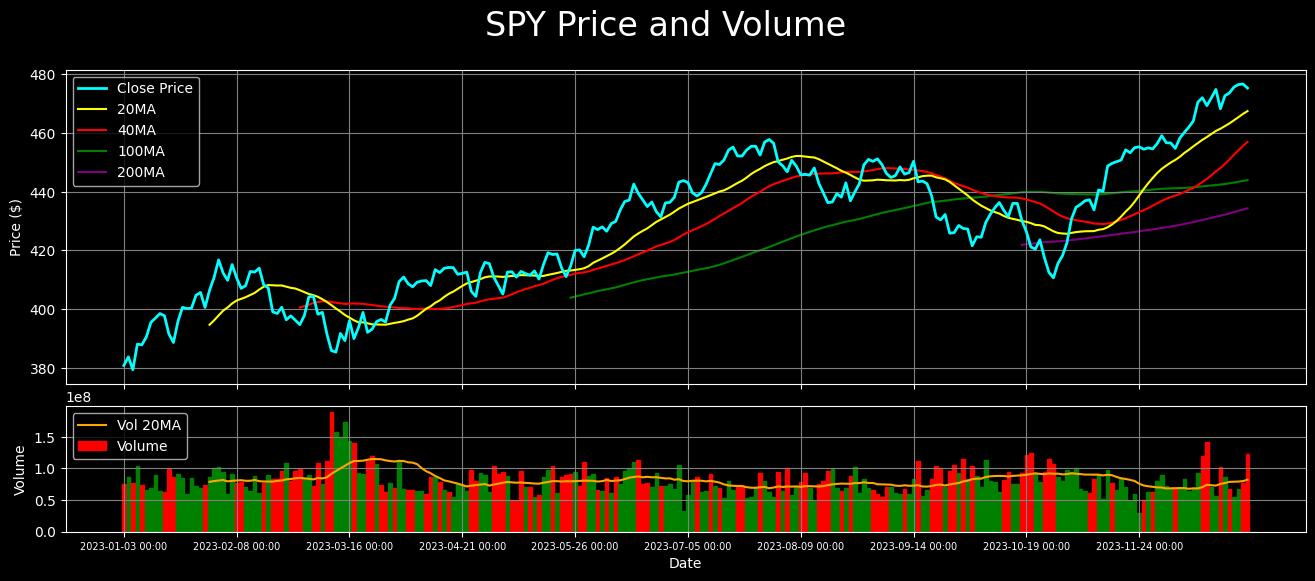

In [10]:
def plot_price_vol(
    data:       pd.DataFrame,
    ticker:     str,
    start:      str              = '1900-01-01',
    end:        str              = '2100-12-31',
    *,
    style:      str              = 'dark_background',
    figsize:    tuple[int, int]  = (16, 6),
    use_price:  str              = 'Close',
    price_clr:  str              = 'cyan',
    price_mas:  list[int] | None = [20, 40, 100, 200],
    prc_ma_clr: list[str]        = ['default'],
    volume:     bool             = True,
    bar_clr:    str              = 'default',
    volume_ma:  int | None       = 20,
    vol_ma_clr: str              = 'orange',
    legendloc:  str | None       = None
) -> None:

    """
    Plot of the price, volume and moving averages of one specified asset
    data: takes unmodified data
    """

    data_to_plot = data.loc[start:end][ticker]
    data_to_plot.index = data_to_plot.index.strftime('%Y-%m-%d %H:%M')
    data_ma = data[ticker]
    data_ma.index = data_ma.index.strftime('%Y-%m-%d %H:%M')

    # Plot
    with plt.style.context(style):
        ratio = 0
        if volume:
            ratio = 2
        fig, axs = plt.subplots(2, figsize=(figsize), height_ratios=(5, ratio), sharex=True)
        plt.suptitle(f'{ticker} Price and Volume', size=24)
        plt.subplots_adjust(hspace=0.1)

        # Price
        axs[0].plot(data_to_plot[use_price], color=price_clr, linewidth=2, zorder=len(price_mas), label=f'{use_price} Price')

        # Moving Averages
        if price_mas != None:
            if prc_ma_clr == ['default']:
                 prc_ma_clr = ['yellow', 'red', 'green', 'purple']
            for m, c, z in zip(price_mas, range(len(prc_ma_clr)+100), range(len(price_mas)-1, -1, -1)):
                axs[0].plot(data_ma[use_price].rolling(m).mean().loc[start:end],
                            color=prc_ma_clr[c % len(prc_ma_clr)],
                            zorder=z,
                            label=f'{m}MA')

        axs[0].grid(which='major', color='grey')
        axs[0].set_ylabel('Price ($)')
        axs[0].legend(loc=legendloc)

        # Volume
        if volume:
            # Color the volume bar according to if the price went up or down during that period
            if bar_clr == 'default':
                intraday_ret = (data_ma['Close'] - data_ma['Open']) / data_ma['Open'] * 100
                bar_clr = pd.Series(['red' if ret < 0 else 'green' for ret in intraday_ret],
                                    index=intraday_ret.index
                                    ).loc[start:end]

            axs[1].bar(x=data_to_plot.index,
                       height=data_to_plot['Volume'],
                       color=bar_clr,
                       edgecolor=bar_clr,
                       label='Volume')

            # Volume Moving Average
            if volume_ma != None:
                axs[1].plot(data_ma['Volume'].rolling(volume_ma).mean().loc[start:end],
                            color=vol_ma_clr,
                            label=f'Vol {volume_ma}MA')

            axs[1].grid(which='major', color='grey')
            axs[1].set_ylabel('Volume')
            axs[1].legend(loc=legendloc)

        plt.xticks(np.arange(len(data_to_plot), step=max(len(data_to_plot) // 10, 1)), size=7)
        plt.xlabel('Date')

        plt.show()

plot_price_vol(data, 'SPY')

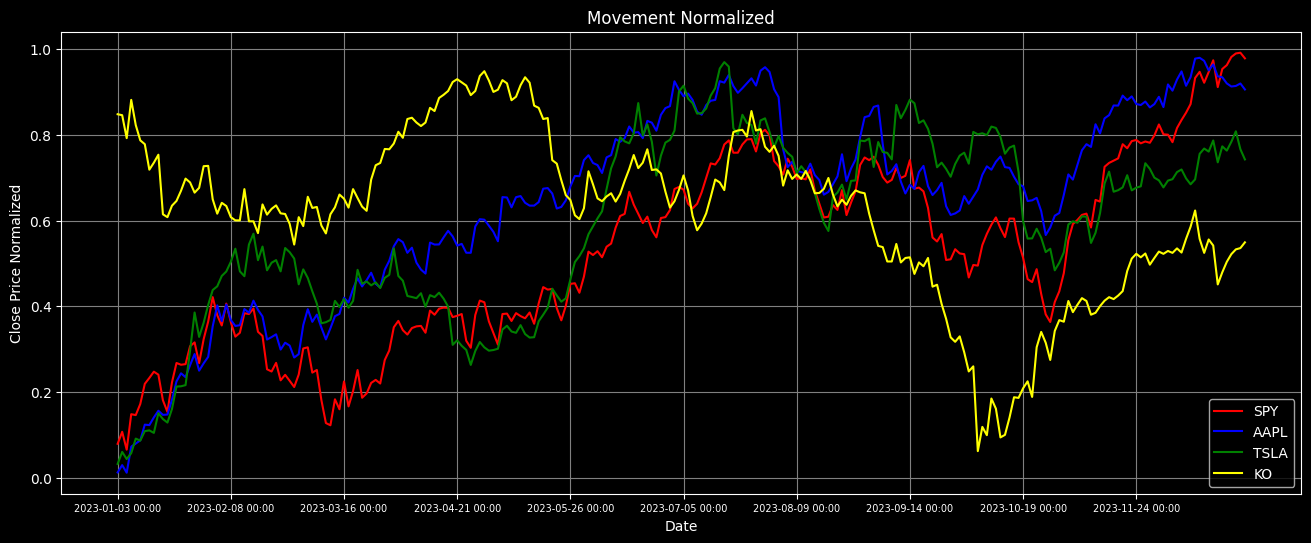

In [11]:
def plot_norm_moves(
    data_norm: pd.DataFrame,
    tickers:   list[str]  = ['show_all'],
    start:     str        = '1900-01-01',
    end:       str        = '2100-12-31',
    *,
    style:     str        = 'dark_background',
    figsize:   tuple[int] = (16, 6),
    use_price: str        = 'Close_norm',
    colors:    list[str]  = ['default'],
    legendloc: str | None = None
) -> None:

    """
    Plot the normalized price, can compare movements between assets if more than one ticker is given
    """

    # Declare variables
    if tickers == ['show_all']:
        tickers = data_norm.columns.get_level_values(0).unique()
    # Default color palette of 12 colors
    if colors == ['default']:
        colors = ['red', 'blue', 'green', 'yellow', 'magenta', 'cyan', 'purple', 'orange', 'lightblue', 'lightgreen', 'brown', 'gray']
    data_to_plot = data_norm.loc[start:end][tickers]
    data_to_plot.index = data_to_plot.index.strftime('%Y-%m-%d %H:%M')

    # Plot
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        plt.title('Movement Normalized')

        for i, tk in enumerate(tickers):
            plt.plot(data_to_plot[tk, use_price], color=colors[i % len(colors)], alpha=1, label=tk)

        plt.grid(which='major', color='grey')
        plt.xticks(np.arange(len(data_to_plot), step=max(len(data_to_plot) // 10, 1)), size=7)
        plt.xlabel('Date')
        plt.ylabel(f'{use_price.split("_")[0]} Price Normalized')
        plt.legend(loc=legendloc)
        plt.show()

plot_norm_moves(data_norm)

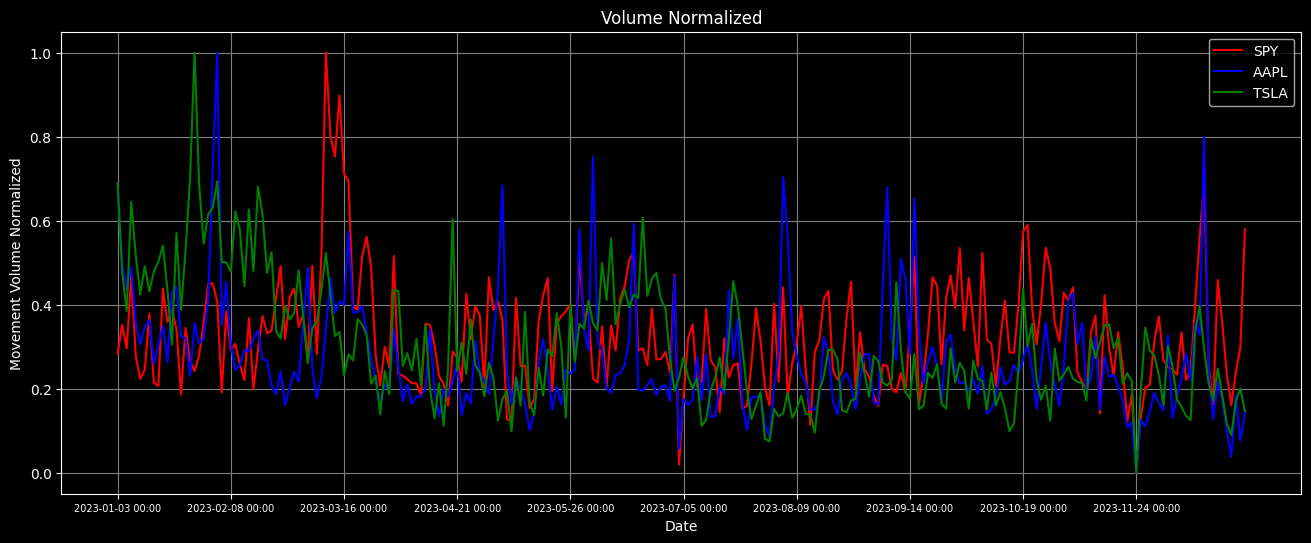

In [12]:
def plot_norm_vol(
    data_norm: pd.DataFrame,
    tickers:   list[str]  = ['first_three'],
    start:     str        = '1900-01-01',
    end:       str        = '2100-12-31',
    *,
    style:     str        = 'dark_background',
    figsize:   tuple[int] = (16, 6),
    colors:    list[str]  = ['red', 'blue', 'green'],
    legendloc: str | None = None
) -> None:

    """
    Plot movement of the volume normalized
    """
    if tickers == ['first_three']:
        tickers = returns.columns.get_level_values(0).unique()[:3]
    data_to_plot = data_norm.loc[start:end][tickers]
    data_to_plot.index = data_to_plot.index.strftime('%Y-%m-%d %H:%M')

    # Plot
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        plt.title('Volume Normalized')

        for ticker, color in zip(tickers, colors):
            plt.plot(data_to_plot[ticker, 'Volume_norm'], label=ticker, color=color)

        plt.grid(which='major', color='grey')
        plt.xticks(np.arange(len(data_to_plot), step=max(len(data_to_plot) // 10, 1)), size=7)
        plt.xlabel('Date')
        plt.ylabel('Movement Volume Normalized')
        plt.legend(loc=legendloc)
        plt.show()

plot_norm_vol(data_norm)

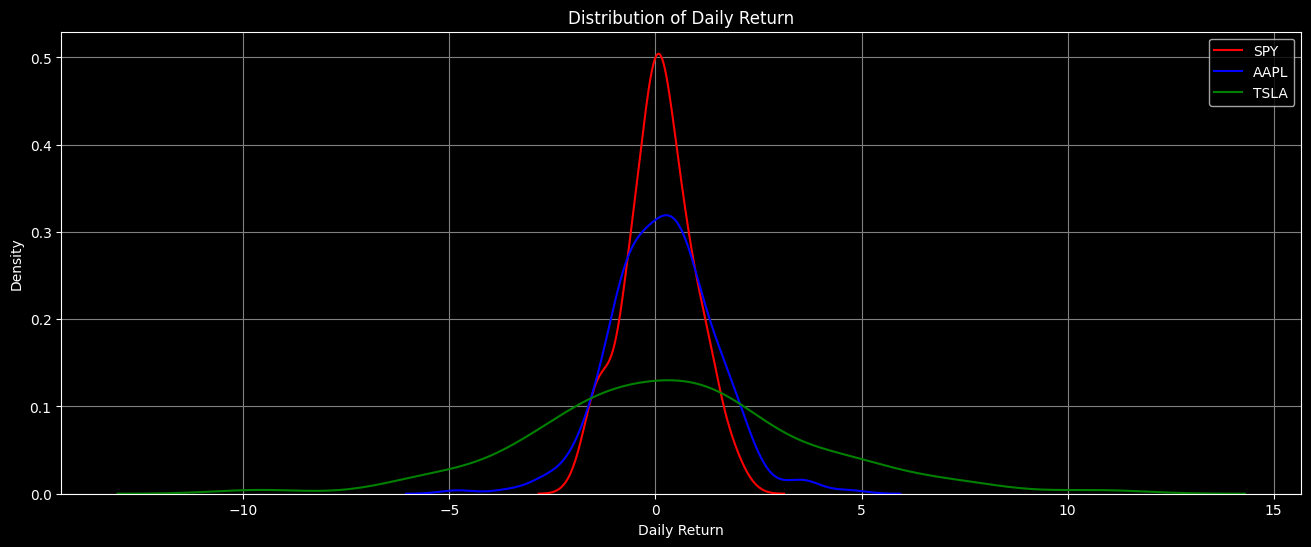

In [13]:
def plot_dist_ret(
    returns:  pd.DataFrame,
    tickers:  list[str]  = ['first_three'],
    start:    str        = '1900-01-01',
    end:      str        = '2100-12-31',
    *,
    style:    str        = 'dark_background',
    figsize:  tuple[int] = (16, 6),
    use_ret:  str        = 'Daily_ret',
    colors:   list[str]  = ['red', 'blue', 'green'],
    hist:     bool       = True,
    kde:      bool       = True
) -> None:

    """
    Docs, max of three tickers will be shown
    """

    if tickers == ['first_three']:
        tickers = returns.columns.get_level_values(0).unique()[:3]
    else:
        tickers = tickers[:3]
    data_to_plot = returns.loc[start:end][tickers]

    with plt.style.context(style):
        plt.figure(figsize=figsize)
        plt.title(f'Distribution of {use_ret.split("_")[0]} Return')

        for ticker, color in zip(tickers, colors):
            if hist:
                sns.histplot(data_to_plot[ticker,  use_ret], bins=50, color=color, edgecolor=None, alpha=0.5, kde=False, stat="density", zorder=2, label=ticker)
            if kde:
                sns.kdeplot(data_to_plot[ticker,  use_ret], color=color, zorder=2, label=ticker)

        plt.grid(which='major', color='grey', zorder=0)
        plt.xlabel(f'{use_ret.split("_")[0]} Return')
        plt.ylabel(f'Density')
        plt.legend()

        plt.show()

plot_dist_ret(returns, hist=False)

In [14]:
# def get_minute(
#     data: pd.DataFrame,
#     *,
#     concat: bool = False,
#     place:  str  = 'beg'
# ) -> pd.DataFrame:

#     """
#     Creates a DataFrame with the week number of the year and you can concatenate it with the source DataFrame

#     ### Params
#     place: str='beg'
#         'beg' or 'end'

#     #### Returns DataFrame
#     """

#     var = 'Minute'

#     if concat and f'{var}' in data.columns.get_level_values(0).unique():
#         print(f'! - Already a column of first level named "{var}". No changes were made. - !')
#         return data

#     df = pd.DataFrame(index=data.index)
#     df[f'{var}'] = data.index.to_frame().iloc[:,0].dt.minute

#     if concat:
#         df.columns = pd.MultiIndex.from_arrays([[f'{var}'], ['Num']])
#         if place == 'end':
#             return pd.concat([data, df], axis=1)
#         return pd.concat([df, data], axis=1)
#     return df

# data_mod = get_minute(data_mod, concat=True)
# data_mod

In [15]:
# def get_hour(
#     data: pd.DataFrame,
#     *,
#     concat: bool = False,
#     place:  str  = 'beg'
# ) -> pd.DataFrame:

#     """
#     Creates a DataFrame with the week number of the year and you can concatenate it with the source DataFrame

#     ### Params
#     place: str='beg'
#         'beg' or 'end'

#     #### Returns DataFrame
#     """

#     var = 'Hour'

#     if concat and f'{var}' in data.columns.get_level_values(0).unique():
#         print(f'! - Already a column of first level named "{var}". No changes were made. - !')
#         return data

#     df = pd.DataFrame(index=data.index)
#     df[f'{var}'] = data.index.to_frame().iloc[:,0].dt.hour

#     if concat:
#         df.columns = pd.MultiIndex.from_arrays([[f'{var}'], ['Num']])
#         if place == 'end':
#             return pd.concat([data, df], axis=1)
#         return pd.concat([df, data], axis=1)
#     return df

# data_mod = get_hour(data_mod, concat=True)
# data_mod

In [16]:
# def get_weekday(
#     data: pd.DataFrame,
#     *,
#     concat: bool = False,
#     place:  str  = 'beg',
#     name:   bool = False,
#     num:    bool = True
# ) -> pd.DataFrame:

#     """
#     Creates a DataFrame with the number and name of the day of the week and you can concatenate it with the source DataFrame

#     ### Params
#     place: str='beg'
#         'beg' or 'end'

#     #### Returns DataFrame
#     """

#     var = 'Weekday'

#     if concat and f'{var}' in data.columns.get_level_values(0).unique():
#         print(f'! - Already a column of first level named "{var}". No changes were made. - !')
#         return data

#     df = pd.DataFrame(index=data.index)
#     if num:
#         df[f'{var}_Num'] = data.index.to_frame().iloc[:,0].dt.weekday + 1
#     if name:
#         df[f'{var}_Name'] = data.index.to_frame().iloc[:,0].dt.day_name()

#     if concat:
#         df.columns = pd.MultiIndex.from_product([[f'{var}'], [col.split('_')[1] for col in df.columns]])
#         if place == 'end':
#             return pd.concat([data, df], axis=1)
#         return pd.concat([df, data], axis=1)
#     return df

# data_mod = get_weekday(data_mod, concat=True)
# data_mod

In [17]:
# def get_dayofmonth(
#     data: pd.DataFrame,
#     *,
#     concat: bool = False,
#     place:  str  = 'beg'
# ) -> pd.DataFrame:

#     """
#     Creates a DataFrame with the week number of the year and you can concatenate it with the source DataFrame

#     ### Params
#     place: str='beg'
#         'beg' or 'end'

#     #### Returns DataFrame
#     """

#     var = 'Dayofmonth'

#     if concat and f'{var}' in data.columns.get_level_values(0).unique():
#         print(f'! - Already a column of first level named "{var}". No changes were made. - !')
#         return data

#     df = pd.DataFrame(index=data.index)
#     df[f'{var}'] = data.index.to_frame().iloc[:,0].dt.day

#     if concat:
#         df.columns = pd.MultiIndex.from_arrays([[f'{var}'], ['Num']])
#         if place == 'end':
#             return pd.concat([data, df], axis=1)
#         return pd.concat([df, data], axis=1)
#     return df

# data_mod = get_dayofmonth(data_mod, concat=True)
# data_mod

In [18]:
# def get_month(
#     data: pd.DataFrame,
#     *,
#     concat: bool = False,
#     place:  str  = 'beg',
#     name:   bool = False,
#     num:    bool = True
# ) -> pd.DataFrame:

#     """
#     Adds columns with the number and name of the month
#     """

#     var = 'Month'

#     if concat and f'{var}' in data.columns.get_level_values(0).unique():
#         print(f'! - Already a column of first level named "{var}". No changes were made. - !')
#         return data

#     df = pd.DataFrame(index=data.index)
#     if num:
#         df[f'{var}_Num']  = data.index.to_frame().iloc[:,0].dt.month
#     if name:
#         df[f'{var}_Name'] = data.index.to_frame().iloc[:,0].dt.month_name()

#     if concat:
#         df.columns = pd.MultiIndex.from_product([[f'{var}'], [col.split('_')[1] for col in df.columns]])
#         if place == 'end':
#             return pd.concat([data, df], axis=1)
#         return pd.concat([df, data], axis=1)
#     return df

# data_mod = get_month(data_mod, concat=True)
# data_mod

In [19]:
# def get_quarter(
#     data: pd.DataFrame,
#     *,
#     concat: bool = False,
#     place:  str  = 'beg'
# ) -> pd.DataFrame:

#     """
#     Creates a DataFrame with the week number of the year and you can concatenate it with the source DataFrame

#     ### Params
#     place: str='beg' or 'end'
#         'beg' or 'end'

#     #### Returns DataFrame
#     """

#     var = 'Quarter'

#     if concat and f'{var}' in data.columns.get_level_values(0).unique():
#         print(f'! - Already a column of first level named "{var}". No changes were made. - !')
#         return data

#     df = pd.DataFrame(index=data.index)
#     df[f'{var}'] = data.index.to_frame().iloc[:,0].dt.quarter

#     if concat:
#         df.columns = pd.MultiIndex.from_arrays([[f'{var}'], ['Num']])
#         if place == 'end':
#             return pd.concat([data, df], axis=1)
#         return pd.concat([df, data], axis=1)
#     return df

# data_mod = get_quarter(data_mod, concat=True)
# data_mod

In [20]:
# def get_year(
#     data:   pd.DataFrame,
#     *,
#     concat: bool = False,
#     place:  str  = 'beg'
# ) -> pd.DataFrame:

#     """
#     Adds a column with the year
#     """

#     var = 'Year'

#     if concat and f'{var}' in data.columns.get_level_values(0).unique():
#         print(f'! - Already a column of first level named "{var}". No changes were made. - !')
#         return data

#     df = pd.DataFrame(index=data.index)
#     df[f'{var}'] = data.index.to_frame().iloc[:,0].dt.year

#     if concat:
#         df.columns = pd.MultiIndex.from_arrays([[f'{var}'], ['Num']])
#         if place == 'end':
#             return pd.concat([data, df], axis=1)
#         return pd.concat([df, data], axis=1)
#     return df

# data_mod = get_year(data_mod, concat=True)
# data_mod